# Chapter 4

In [8]:
import numpy as np

# rand vs randn:
# rand is for values [0, 1) uniformly.
# randn is for normal distribution values centered around 0 with variance 1.

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

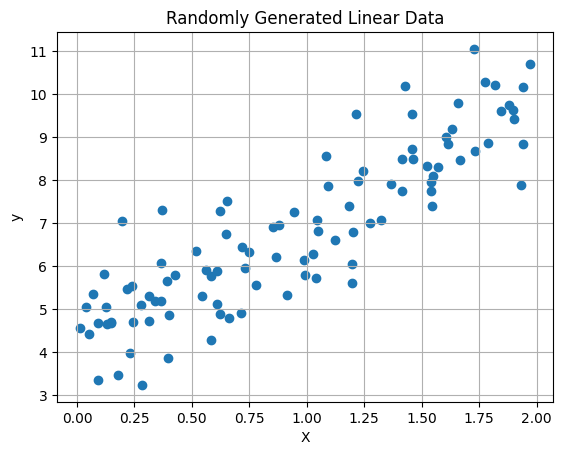

In [60]:
import matplotlib.pyplot as plt

plt.scatter(X, y, label="Sample Point")
plt.grid(True)
plt.ylabel("y")
plt.xlabel("X")
plt.title("Randomly Generated Linear Data")
plt.show()

In [61]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [62]:
theta_best

array([[4.21509616],
       [2.77011339]])

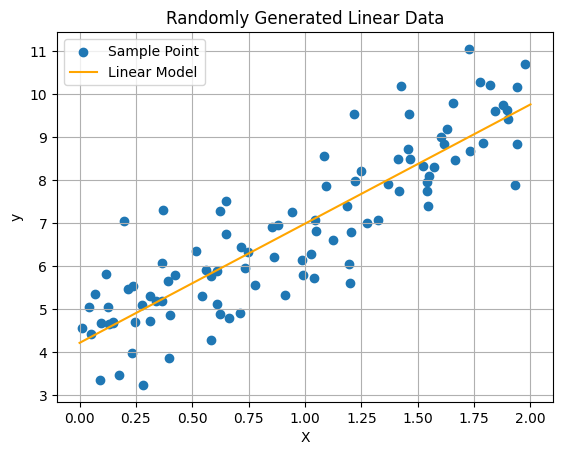

In [67]:
Xs = np.linspace(0.0, 2.0, 2)
Xs = Xs.reshape(2, 1)

Xs_b = add_dummy_feature(Xs)
ys = Xs_b @ theta_best

plt.scatter(X, y, label="Sample Point")
plt.plot(Xs, ys, color="orange", label="Linear Model")
plt.grid(True)
plt.ylabel("y")
plt.xlabel("X")
plt.title("Randomly Generated Linear Data")
plt.legend()
plt.show()

In [69]:
X_new = np.array([[0.0], [2.0]])
X_new_b = add_dummy_feature(X_new)  # Add's x_0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

# and then we can plot this the same way....

array([[4.21509616],
       [9.75532293]])

In [71]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(f"{lin_reg.intercept_=}")
print(f"{lin_reg.coef_=}")

lin_reg.intercept_=array([4.21509616])
lin_reg.coef_=array([[2.77011339]])


In [72]:
# We can use numpy's least squares function to do this as well
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1.0e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [74]:
# We can also leverage numpy's pseudoinverse function too
# (Moore-Penrose inverse).
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [76]:
U, S, Vh = np.linalg.svd(X_b)

In [77]:
(U * S) @ Vh

ValueError: operands could not be broadcast together with shapes (100,100) (2,) 

In [78]:
(np.array([1.0, 2.0, 3.0]))**2

array([1., 4., 9.])